# Build Framework: Cloning and Building Darknet


In [1]:
# clone darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15851 (delta 5), reused 13 (delta 4), pack-reused 15833
Receiving objects: 100% (15851/15851), 14.42 MiB | 13.08 MiB/s, done.
Resolving deltas: 100% (10671/10671), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [4]:
# make darknet
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: wa

Using the below helper function to view images

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

# Mount Google Drive Files


In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/MyDrive/FishSight/ /drive

In [ ]:
# cd back into the darknet folder to run detections
%cd ..
%cd /content/darknet

/
/content/darknet


# TRAINING:



In order to create a custom YOLOv4-TINY detector we will need the following:

*   Labeled Dataset
*   .cfg file
*   obj.data and obj.names files
*   train.txt file, test.txt


# Step 1: Gathering and Labeling a Custom Dataset
In order to create an object detector you need a labeled dataset, this may be the most important area to focus on in order to obtain high accuracy models



# Step 2: Configuring Files for Training
This step involves properly configuring your custom .cfg file, obj.data, obj.names and train.txt file.


```
set batch=24, this means we will be using 24 images for every training step
set subdivisions=8, the batch will be divided by 8 to decrease GPU VRAM requirement
width= 608 (multiples of 32)
height= 608 (increasing: more prescision, less speed)
maxbatches= max(# classes * 3000, # images, 6000) (How long to train for)
steps=(80% of maxbatch & 90% of maxbatch)
filters=(# of classes + 5) * 3 = 18
for memory issues set random = 0
```

In [ ]:
# upload the yolov4-tiny .cfg back to cloud VM from Google Drive
!cp /drive/YOLO/yolov4-tiny.cfg ./cfg

Uploading obj.names & obj.data into darknet data folder

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /drive/YOLO/obj.names ./data
!cp /drive/YOLO/obj.data  ./data

Uploading scripts to create a txt file of the train.zip & test.zip

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /drive/YOLO/generate_namelist.py ./

Now run the python script

In [ ]:
!python generate_namelist.py train
!python generate_namelist.py test

In [ ]:
# verify train.txt and text.txt can be seen in our darknet/data folder
!cp /drive/data/train.txt ./data/
!cp /drive/data/test.txt ./data/
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.names	     test.txt
coco9k.map  giraffe.jpg  imagenet.shortnames.list  openimages.names  train.txt
coco.names  goal.txt	 labels			   person.jpg	     voc.names
dog.jpg     horses.jpg	 obj.data		   scream.jpg


# Step 3: Download pre-trained weights for the convolutional layers.
Using pretrained weights allows a more accurate detection with less training time

In [ ]:
# upload pretrained convolutional layer weights
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights
!cp /drive/YOLO/yolov4-tiny.conv.29 ./

#Hint:

To avoid colab logging you out hit (CTRL + SHIFT + i) to open consol

Paste the following code into your console window and hit enter
```
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
```

# Step 4: Train the model




In [ ]:
# cd back into the darknet folder to run detections
%cd ..
%cd /content/darknet

/content
/content/darknet


In [ ]:
# train your yolov4-tiny detector
# %%capture training_output
!./darknet detector train data/obj.data cfg/yolov4-tiny.cfg yolov4-tiny.conv.29 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.002178, iou_loss = 0.000000, total_loss = 0.002178 
 total_bbox = 46284, rewritten_bbox = 1.279060 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000284, iou_loss = 0.000000, total_loss = 0.000284 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.536497), count: 3, class_loss = 0.743596, iou_loss = 14.330648, total_loss = 15.074244 
 total_bbox = 46287, rewritten_bbox = 1.278977 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.577247), count: 1, class_loss = 0.191081, iou_loss = 0.354331, total_loss = 0.545412 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.642407), count: 44, class_loss = 12.303607, iou_loss = 130.664993, total_loss = 142.968597 
 

In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
# start training again from previous weights
!./darknet detector train data/obj.data cfg/yolov4-tiny.cfg /drive/YOLO/backup_d/yolov4-tiny_last.weights -dont_show -map

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 

Start training again from previous weights


# Step 5: Checking the Mean Average Precision (mAP) of Your Model

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-tiny.cfg /drive/YOLO/backup_d/yolov4-tiny_1000.weights

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	     

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-tiny.cfg /drive/YOLO/backup_d/yolov4-tiny_2000.weights

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	     

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-tiny.cfg /drive/YOLO/backup_d/yolov4-tiny_3000.weights

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	     

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-tiny.cfg /drive/YOLO/backup_d/yolov4-tiny_4000.weights

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	     

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-tiny.cfg /drive/YOLO/backup_d/yolov4-tiny_5000.weights

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	     

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-tiny.cfg /drive/YOLO/backup_d/yolov4-tiny_final.weights

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	     

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-tiny.cfg /drive/YOLO/backup_d/yolov4-tiny_final.weights -dont_show < data/train.txt > result.txt

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	                           ->  152 x 152 x 128 
   9 max                2x 2/ 2    152 x 152 x 128 ->   76 x  76 x 128 0.003 BF
  10 conv    128    

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-tiny.cfg /drive/YOLO/backup_d/yolov4-tiny_final.weights -dont_show -out >> /drive/data/test_test.txt < data/test.txt > /drive/data/result_test.txt

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	                           ->  152 x 152 x 128 
   9 max                2x 2/ 2    152 x 152 x 128 ->   76 x  76 x 128 0.003 BF
  10 conv    128    

# Step 7: Run Your Custom Object Detector!!!
You have done it! You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	     

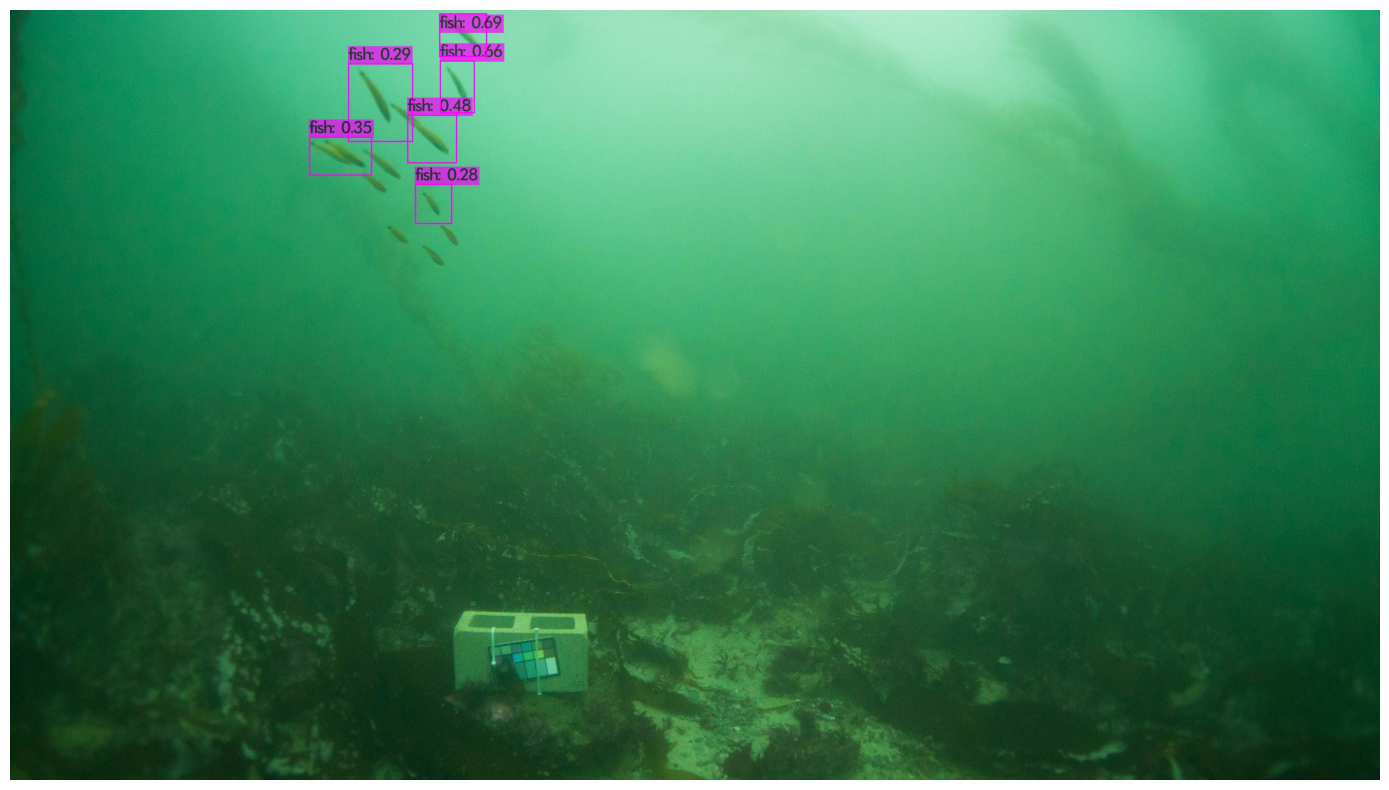

In [ ]:
# run your custom detector on image
!./darknet detector test data/obj.data cfg/yolov4-tiny.cfg /drive/YOLO/backup_d/yolov4-tiny_final.weights /drive/data/test/180719_123947.jpg -Threshold
imShow('predictions.jpg')

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	     

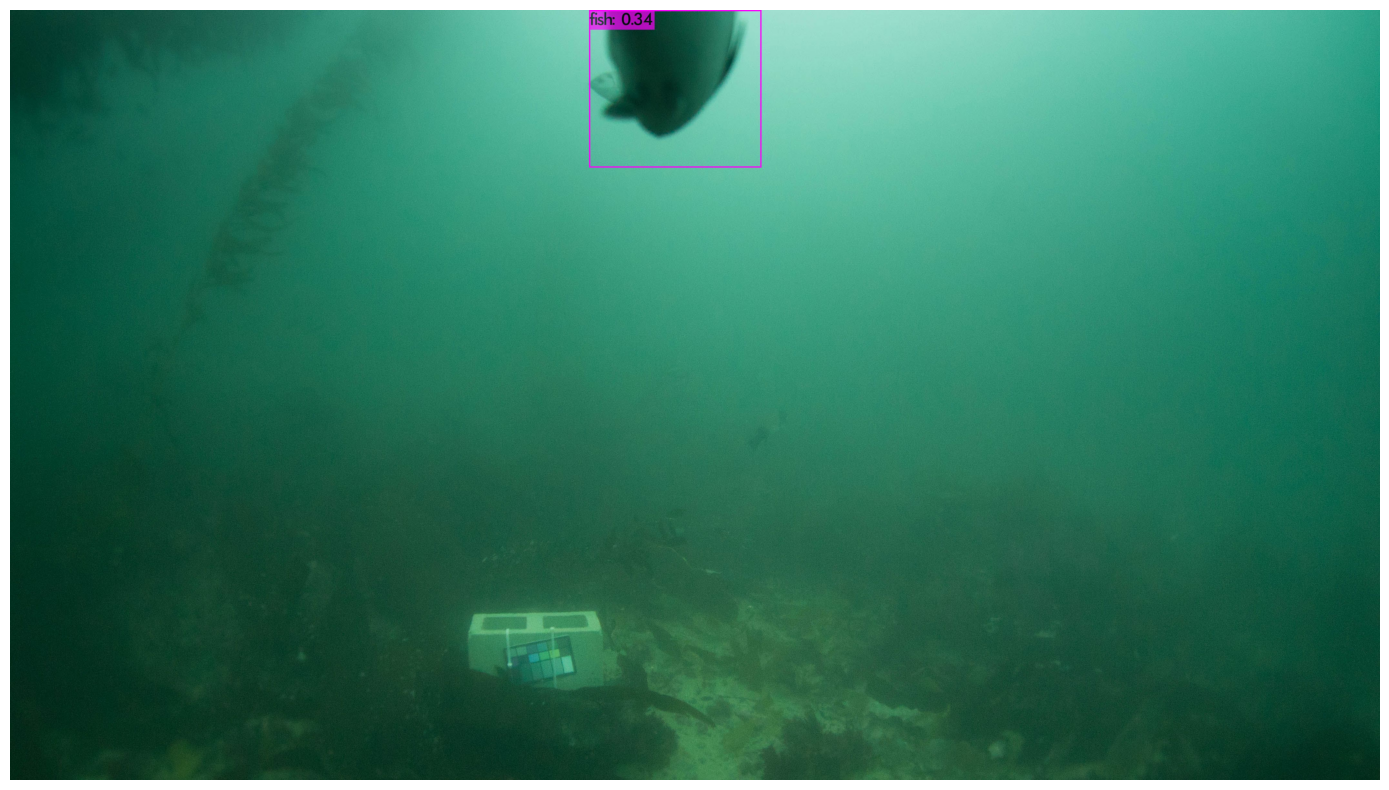

In [ ]:
# run your custom detector on image
!./darknet detector test data/obj.data cfg/yolov4-tiny.cfg /drive/YOLO/backup_d/yolov4-tiny_final.weights /drive/data/test/180710_134925.jpg -Threshold -out
imShow('predictions.jpg')

In [ ]:
!ls

sample_data


# Cheers!